### Time series data nalysis using ARIMA method

In [40]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn; seaborn.set()

In [41]:
# load data as date and value (real number) for each row
parser = lambda x: pd.to_datetime(x, format='%Y-%m')
df = pd.read_csv('data.csv', header=0, names=['date', 'value'], index_col=['date'], 
                 parse_dates=['date'], date_parser=parser)
df.head()

,value
date,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [42]:
# convert dataframe to series
ts = df['value']
ts.head()

date
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
Name: value, dtype: float64

In [43]:
ts.tail()

date
1808-05-01    13.5
1808-06-01    13.5
1808-07-01     6.7
1808-08-01     8.0
1808-09-01    11.7
Name: value, dtype: float64

In [44]:
ts.describe()

count    717.000000
mean      51.033194
std       39.640773
min        0.000000
25%       20.700000
50%       43.100000
75%       72.000000
max      238.900000
Name: value, dtype: float64

#### The data are 717 monthly values from 1749-01 to 1808-09. Minimum value is 0 and maximum 238.9, with mean of 51.03 and standard deviation of 39.64

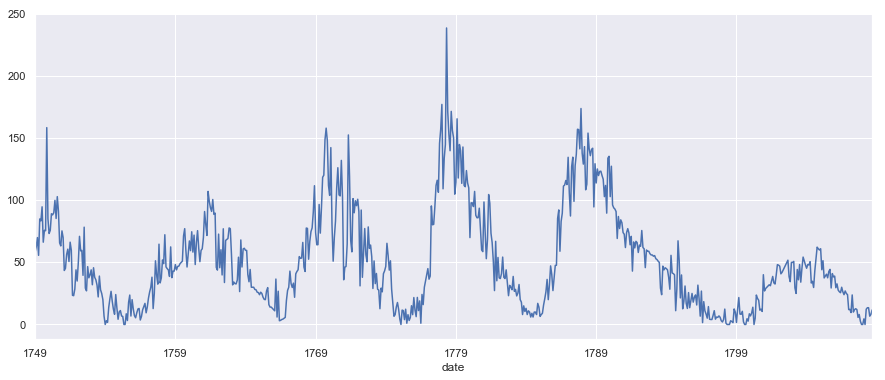

In [45]:
# plot data
ts.plot()

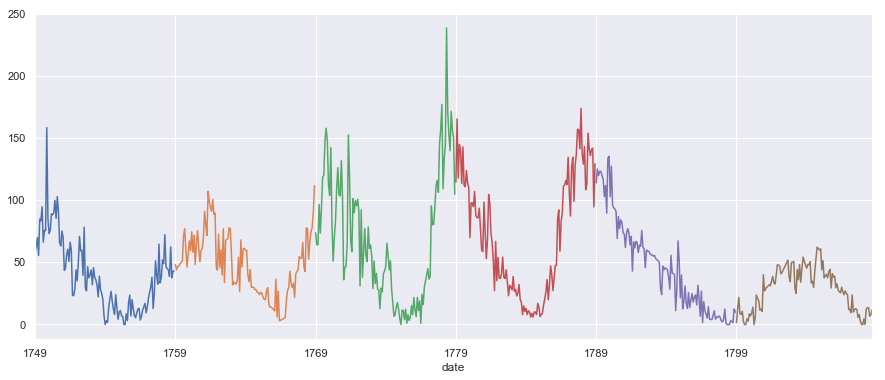

In [46]:
# plot data by 10 year periods for visual only
ts['1749':'1758'].plot()
ts['1759':'1768'].plot()
ts['1769':'1778'].plot()
ts['1779':'1788'].plot()
ts['1789':'1798'].plot()
ts['1799':'1808'].plot()

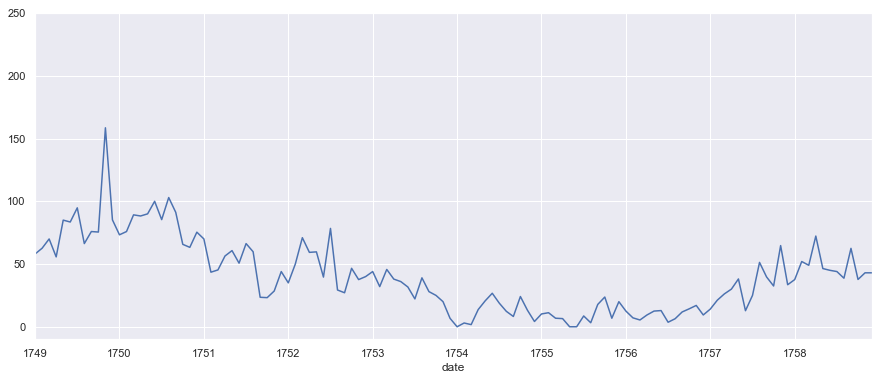

In [47]:
# closer look at the 10 year periods
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1749':'1758'].plot()

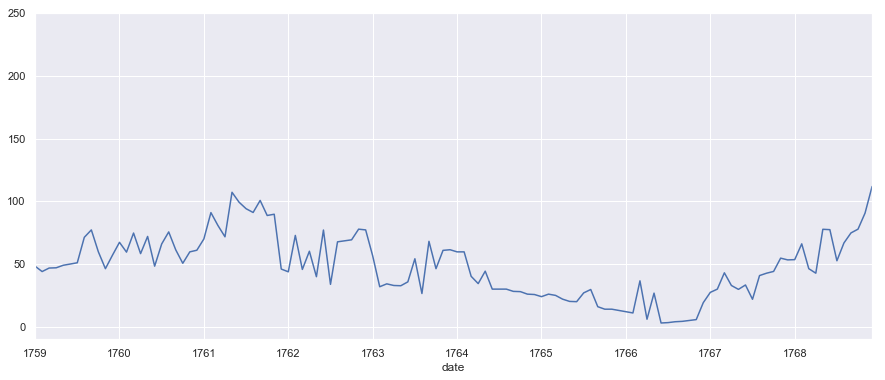

In [48]:
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1759':'1768'].plot()

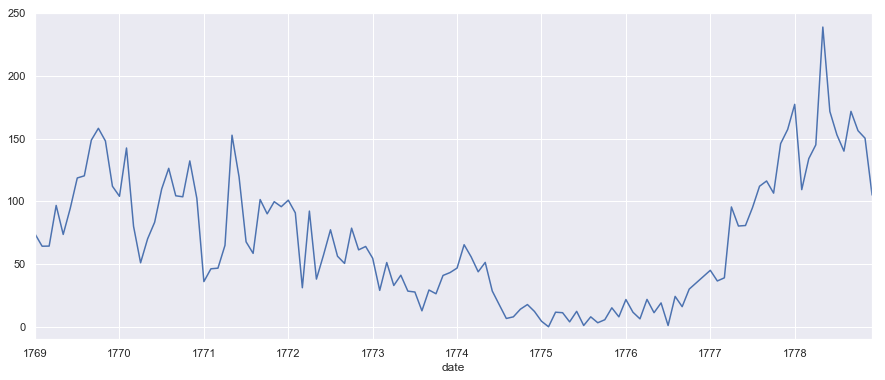

In [49]:
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1769':'1778'].plot()

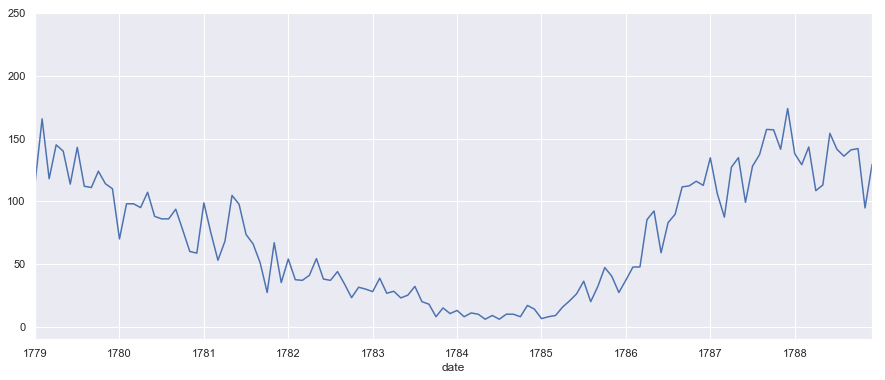

In [50]:
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1779':'1788'].plot()

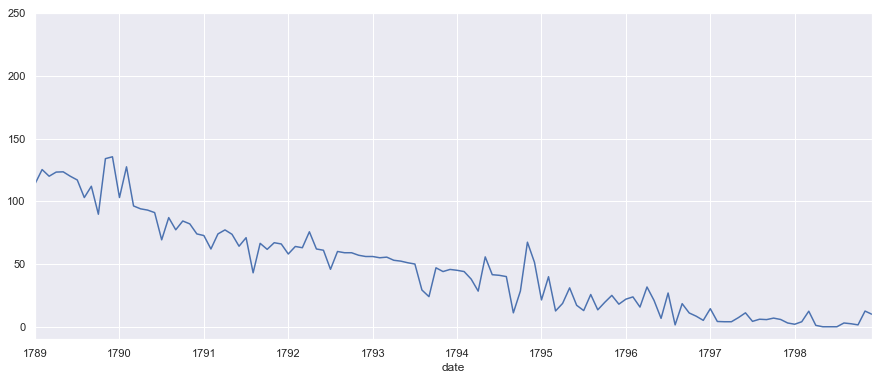

In [51]:
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1789':'1798'].plot()

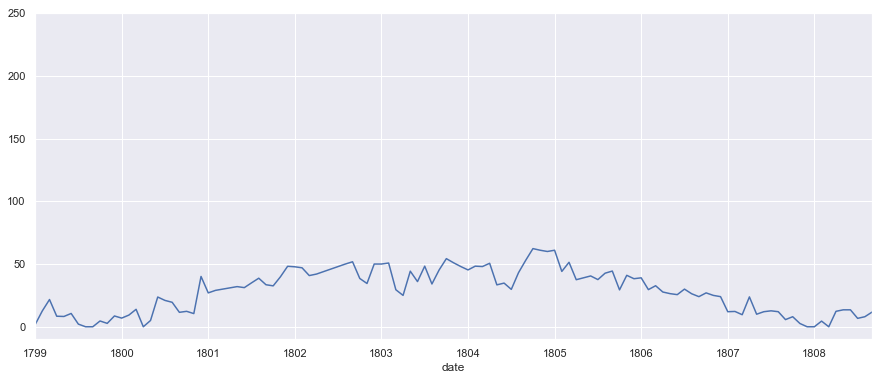

In [52]:
axes = plt.gca()
axes.set_ylim(-10, 250)
ts['1799':'1808'].plot()

#### Looking at the graphs the data appear to be not stationary as there are trends (mean, variance and covariance are not constant over time)

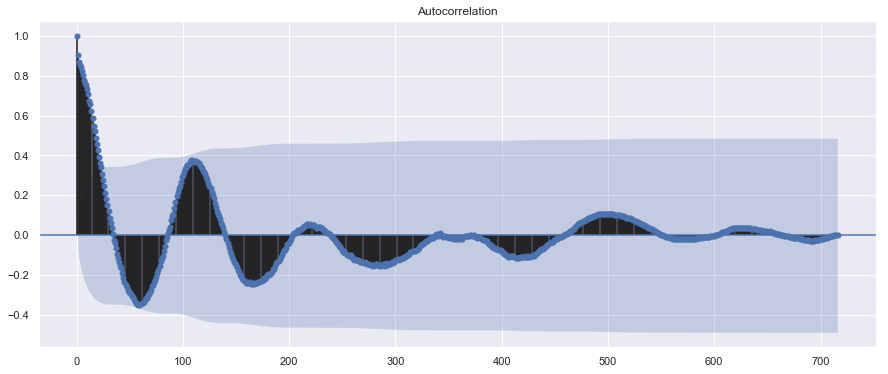

In [53]:
# check stationarity with plot_acf method from statsmodels library
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts);

#### The above graphs confirms that the data is not stationary

In [54]:
# converting series to stationary
ts_diff = ts.diff(periods=1)    # integrated of order of 1, denoted by d (for difference), one of the parameter of ARIMA model
ts_diff.dropna(inplace=True)
ts_diff.head()

date
1749-02-01     4.6
1749-03-01     7.4
1749-04-01   -14.3
1749-05-01    29.3
1749-06-01    -1.5
Name: value, dtype: float64

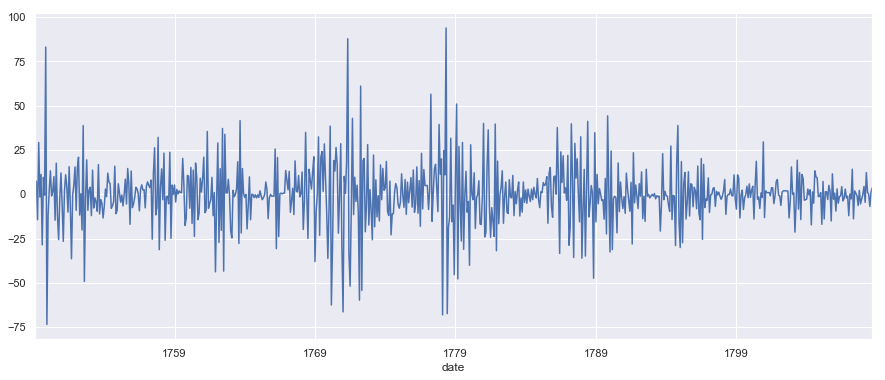

In [55]:
ts_diff.plot()

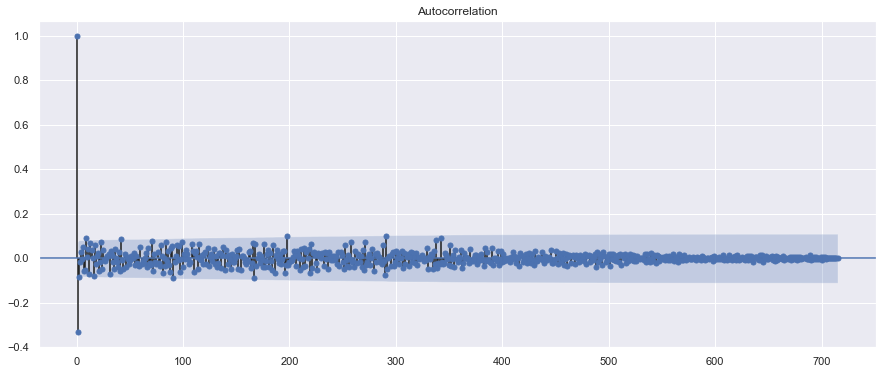

In [56]:
plot_acf(ts_diff);

#### The converted data `ts_diff` looks stationary

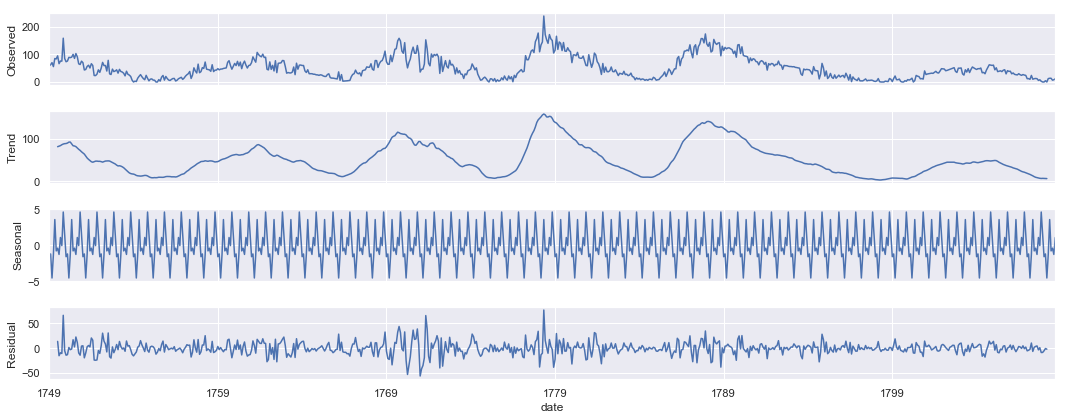

In [57]:
# decomposition of original to trend, sesonal and resiual compoenent
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts, model='additive')
fig = result.plot();

#### Modelling

In [58]:
# train test split
train = ts[:705]    # all data points except of last 12 months
test = ts[705:]    # last year: 12 data points
print(train.size, test.size, train.size+test.size)

705 12 717


In [59]:
# seasonal ARIMA
# p, d, q for ARIMA and P, D, Q for the seasonal component

from pmdarima.arima import auto_arima

stepwise_model = auto_arima(train, start_p=1, start_q=1, max_p=12, max_q=12, m=12,
                            start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                           suppress_warnings=True, stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5837.881, BIC=5860.579, Fit time=1.781 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6442.370, BIC=6451.449, Fit time=0.031 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6148.571, BIC=6166.729, Fit time=0.512 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5840.504, BIC=5858.662, Fit time=0.629 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5839.730, BIC=5866.968, Fit time=2.138 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6257.385, BIC=6275.543, Fit time=0.266 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5839.719, BIC=5866.957, Fit time=4.756 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5839.813, BIC=5871.590, Fit time=5.986 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5838.505, BIC=5865.743, Fit time=2.592 seconds
Fit ARIMA: order=(1, 1, 0) s

In [60]:
future_forecast = stepwise_model.predict(n_periods=12)

In [61]:
print(future_forecast)

[ 6.89506114 11.85997198  8.43059716  4.3740849   3.94252666  0.07532051
  2.24591701  6.64392682  1.71315072  1.43080394  0.01474642  1.80662242]


In [62]:
test.values

array([ 8. ,  2.6,  0. ,  0. ,  4.5,  0. , 12.3, 13.5, 13.5,  6.7,  8. ,
       11.7])

In [63]:
# calculate RMSE
import math
rmse = math.sqrt(sum((future_forecast-test.values)**2))
rmse

25.571855037034734

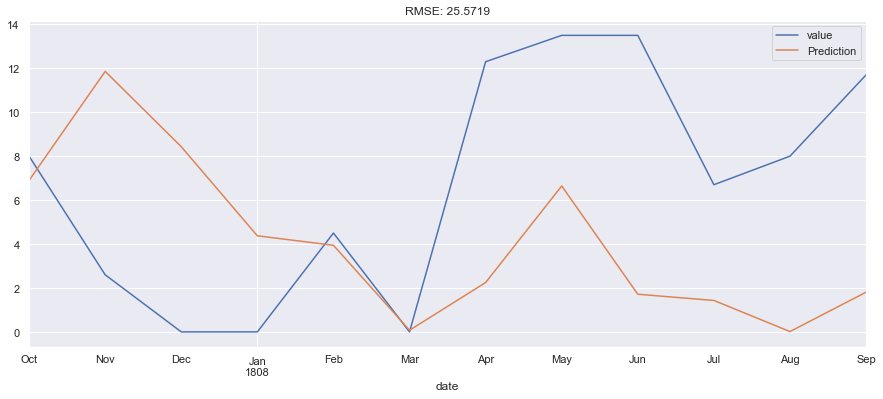

In [64]:
future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()
plt.title('RMSE: %.4f'% rmse);

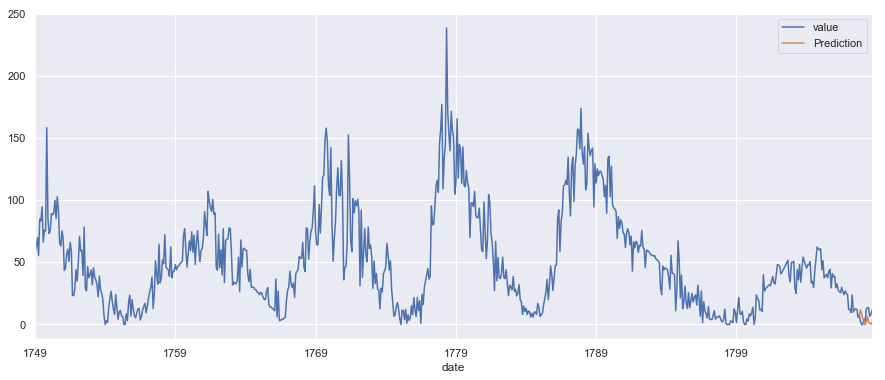

In [65]:
pd.concat([ts,future_forecast],axis=1).plot();

#### Next Steps / Improvements:
* Analyse data on long term seasonality
* Further fine tune ARIMA model parameters p, d, q and P, D, Q, without using stepwise option for better accuracy, but calculation time will be longer
* use longer time period as test period
* Prediction error RMSE of 25 as compared to values range ~250 could be acceptable, the predicted values are in range of the true values. More information about the dataset would be needed to evaluate the perforance, like impact of wrong predictions, business impact, etc.
* Sliding window validation technique